# WTA data exploration

**Imports**

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

## WTA RANKINGS Singles

**1. Data Overview and Cleaning**

In [85]:
# Load the CSV file into a Pandas DataFrame
file_path = '../data/raw/wta-ranking-single-2024-09-08-192909.csv'  #! Replace with your actual file path
df = pd.read_csv(file_path)
df

,Rank,Prior,Unnamed: 0,Name,Nat,Points,# Trn,Added,Off,18th,19th,Unnamed: 1
0,1,(1),"SWIATEK, IGA",NaN,POL,10695,17,NaN,240.0,NaN,NaN,NaN
1,2,(2),"SABALENKA, ARYNA",NaN,NaN,8016,18,NaN,1300.0,10.0,NaN,NaN
2,3,(3),"GAUFF, COCO",NaN,USA,6743,17,NaN,2000.0,NaN,NaN,NaN
3,4,(4),"RYBAKINA, ELENA",NaN,KAZ,5931,19,NaN,130.0,108.0,108.0,NaN
4,5,(5),"PAOLINI, JASMINE",NaN,ITA,5168,22,NaN,10.0,35.0,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1438,1402,(1399),"WANG, TIANMEI",NaN,USA,3,3,NaN,NaN,NaN,NaN,NaN
1439,1402,(1399),"XAVIER LAYDNER, CAROLINA",NaN,BRA,3,3,NaN,NaN,NaN,NaN,NaN
1440,1402,(1399),"XU, NAOMI",NaN,CAN,3,3,NaN,NaN,NaN,NaN,NaN
1441,1402,(1399),"ZHANG, JIN",NaN,CHN,3,3,NaN,NaN,NaN,NaN,NaN


In [86]:
# Inspect the data
print("DataFrame Head:\n", df.head())
print("\nDataFrame Info:\n", df.info())
print("\nDataFrame Description:\n", df.describe())
print("\nDataFrame Shape:\n", df.shape)

DataFrame Head:
        Rank Prior        Unnamed: 0 Name  Nat  Points  # Trn  Added     Off  \
0         1   (1)      SWIATEK, IGA  NaN  POL   10695     17    NaN   240.0   
1         2   (2)  SABALENKA, ARYNA  NaN  NaN    8016     18    NaN  1300.0   
2         3   (3)       GAUFF, COCO  NaN  USA    6743     17    NaN  2000.0   
3         4   (4)   RYBAKINA, ELENA  NaN  KAZ    5931     19    NaN   130.0   
4         5   (5)  PAOLINI, JASMINE  NaN  ITA    5168     22    NaN    10.0   

    18th   19th  Unnamed: 1  
0    NaN    NaN         NaN  
1   10.0    NaN         NaN  
2    NaN    NaN         NaN  
3  108.0  108.0         NaN  
4   35.0   10.0         NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0       Rank    1443 non-null   int64  
 1   Prior       1443 non-null   object 
 2   Unnamed: 0  752 non-null    object 
 3   Name       

In [87]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
     Rank         0
Prior            0
Unnamed: 0     691
Name           743
Nat            112
Points           0
# Trn            0
Added         1172
Off            860
18th           992
19th          1039
Unnamed: 1    1412
dtype: int64


**Column parsing correction:**  
Based on data inspection it seems that there is an error in column parsing from pdf to csv file. To fix this issue action were added:

In [88]:
# Concatenate "Name" and "Unnamed: 0" columns
df['Name'] = df['Name'].fillna('')
df['Unnamed: 0'] = df['Unnamed: 0'].fillna('')

df['Correct Name'] = df['Name'].astype(str) + df['Unnamed: 0'].astype(str) 

In [89]:
# Handling missing values
df['Added'] = df['Added'].fillna('0')
df['Off'] = df['Off'].fillna('0')

df

,Rank,Prior,Unnamed: 0,Name,Nat,Points,# Trn,Added,Off,18th,19th,Unnamed: 1,Correct Name
0,1,(1),"SWIATEK, IGA",,POL,10695,17,0,240.0,NaN,NaN,NaN,"SWIATEK, IGA"
1,2,(2),"SABALENKA, ARYNA",,NaN,8016,18,0,1300.0,10.0,NaN,NaN,"SABALENKA, ARYNA"
2,3,(3),"GAUFF, COCO",,USA,6743,17,0,2000.0,NaN,NaN,NaN,"GAUFF, COCO"
3,4,(4),"RYBAKINA, ELENA",,KAZ,5931,19,0,130.0,108.0,108.0,NaN,"RYBAKINA, ELENA"
4,5,(5),"PAOLINI, JASMINE",,ITA,5168,22,0,10.0,35.0,10.0,NaN,"PAOLINI, JASMINE"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,1402,(1399),"WANG, TIANMEI",,USA,3,3,0,0,NaN,NaN,NaN,"WANG, TIANMEI"
1439,1402,(1399),"XAVIER LAYDNER, CAROLINA",,BRA,3,3,0,0,NaN,NaN,NaN,"XAVIER LAYDNER, CAROLINA"
1440,1402,(1399),"XU, NAOMI",,CAN,3,3,0,0,NaN,NaN,NaN,"XU, NAOMI"
1441,1402,(1399),"ZHANG, JIN",,CHN,3,3,0,0,NaN,NaN,NaN,"ZHANG, JIN"


**Setting column names in line with the WTA documentation:**
* **Rank:** The player's current ranking as of the date the rankings were published.
* **Prior:** The player's ranking from the previous week's rankings.
* **Name:** The player's full name.
* **Nat:** The player's nationality (represented by a 3-letter country code).
* **Points:** The player's current ranking points. The WTA ranking system is based on a rolling 52-week period, and players earn points based on their performance in tournaments.
* **No of trn:**  This column is likely meant to represent the number of tournaments a player has played in the past 52 weeks that count towards her ranking. 
* **Added:** The number of points added to the player's total this week. This could be due to a good performance in a recent tournament.
* **Off:**  The number of points dropped from the player's total this week. This happens because points from tournaments that were played more than 52 weeks ago no longer count towards the ranking.
 
* **Rank Date**  Adding column representing the date when the rankings were refreshed by WTA.

In [90]:
print(df.columns)



Index(['    Rank', 'Prior', 'Unnamed: 0', 'Name', 'Nat', 'Points', '# Trn',
       'Added', 'Off', '18th', '19th', 'Unnamed: 1', 'Correct Name'],
      dtype='object')


In [91]:
df = df[['    Rank', 'Prior', 'Correct Name', 'Nat', 'Points', '# Trn', 'Added', 'Off', '18th', '19th']]
df.columns = ['Rank', 'Prior', 'Name', 'Nationality', 'Points', 'No of trn', 'Added', 'Off', '18th', '19th']

# Add the 'Rank Date' column
df['Rank Date'] = '2024-08-26'

# Remove parentheses from the 'Prior' column
df['Prior'] = df['Prior'].str.replace('(', '').str.replace(')', '')

/var/folders/jw/ktvvs9815jq4wbfmr_fdf_v80000gn/T/ipykernel_2213/1391282041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rank Date'] = '2024-08-26'
/var/folders/jw/ktvvs9815jq4wbfmr_fdf_v80000gn/T/ipykernel_2213/1391282041.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prior'] = df['Prior'].str.replace('(', '').str.replace(')', '')


In [92]:
# Data type conversions 
df['Rank'] = pd.to_numeric(df['Rank'])
df['Prior'] = pd.to_numeric(df['Prior'])
df['Points'] = pd.to_numeric(df['Points'])
df['No of trn'] = pd.to_numeric(df['No of trn'])
df['Added'] = pd.to_numeric(df['Added'])
df['Off'] = pd.to_numeric(df['Off'])
df['18th'] = pd.to_numeric(df['18th'])
df['19th'] = pd.to_numeric(df['19th'])
df['Rank Date'] = pd.to_datetime(df['Rank Date'])

#Rearanging the table
df = df[['Rank Date', 'Name', 'Rank', 'Prior', 'Nationality', 'Points', 'No of trn', 'Added', 'Off', '18th', '19th']]
df


/var/folders/jw/ktvvs9815jq4wbfmr_fdf_v80000gn/T/ipykernel_2213/927436965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rank'] = pd.to_numeric(df['Rank'])
/var/folders/jw/ktvvs9815jq4wbfmr_fdf_v80000gn/T/ipykernel_2213/927436965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prior'] = pd.to_numeric(df['Prior'])
/var/folders/jw/ktvvs9815jq4wbfmr_fdf_v80000gn/T/ipykernel_2213/927436965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,Rank Date,Name,Rank,Prior,Nationality,Points,No of trn,Added,Off,18th,19th
0,2024-08-26,"SWIATEK, IGA",1,1,POL,10695,17,0.0,240.0,NaN,NaN
1,2024-08-26,"SABALENKA, ARYNA",2,2,NaN,8016,18,0.0,1300.0,10.0,NaN
2,2024-08-26,"GAUFF, COCO",3,3,USA,6743,17,0.0,2000.0,NaN,NaN
3,2024-08-26,"RYBAKINA, ELENA",4,4,KAZ,5931,19,0.0,130.0,108.0,108.0
4,2024-08-26,"PAOLINI, JASMINE",5,5,ITA,5168,22,0.0,10.0,35.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
1438,2024-08-26,"WANG, TIANMEI",1402,1399,USA,3,3,0.0,0.0,NaN,NaN
1439,2024-08-26,"XAVIER LAYDNER, CAROLINA",1402,1399,BRA,3,3,0.0,0.0,NaN,NaN
1440,2024-08-26,"XU, NAOMI",1402,1399,CAN,3,3,0.0,0.0,NaN,NaN
1441,2024-08-26,"ZHANG, JIN",1402,1399,CHN,3,3,0.0,0.0,NaN,NaN


In [93]:
df.columns

Index(['Rank Date', 'Name', 'Rank', 'Prior', 'Nationality', 'Points',
       'No of trn', 'Added', 'Off', '18th', '19th'],
      dtype='object')

**2. Univariate Analysis**

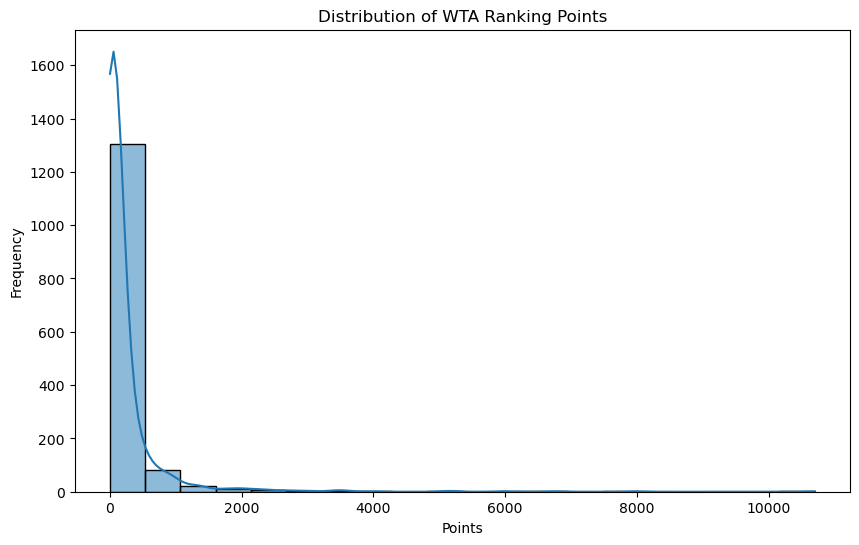

In [98]:
# Histogram of Points
plt.figure(figsize=(10, 6))
sns.histplot(df['Points'], bins=20, kde=True)
plt.title('Distribution of WTA Ranking Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

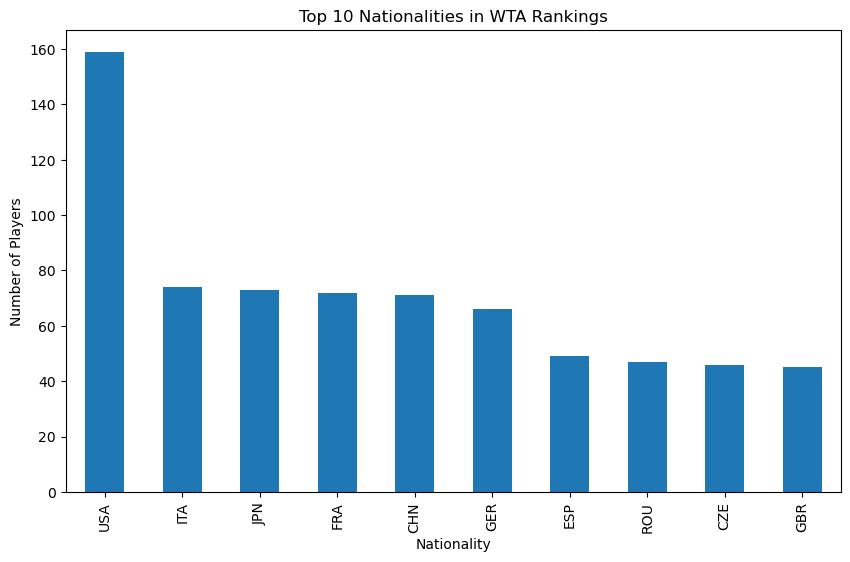

In [96]:
# Bar chart of Nationalities (Top 10)
plt.figure(figsize=(10, 6))
df['Nationality'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Nationalities in WTA Rankings')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.show()

**3. Bivariate Analysis**


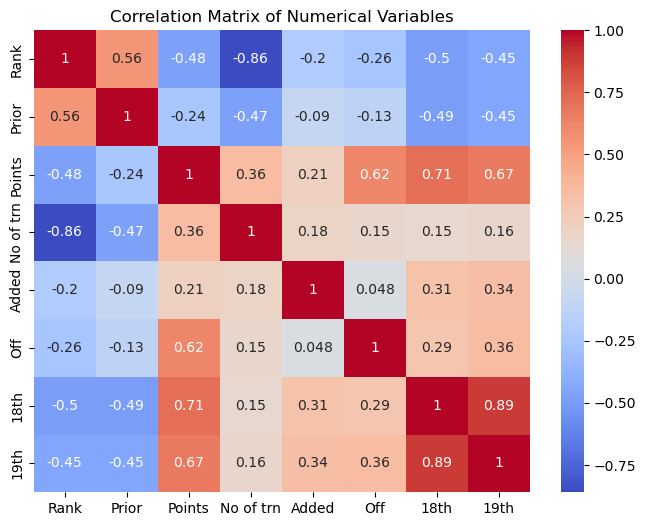

In [103]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
numerical_df = df.select_dtypes(include='number')
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm') 
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

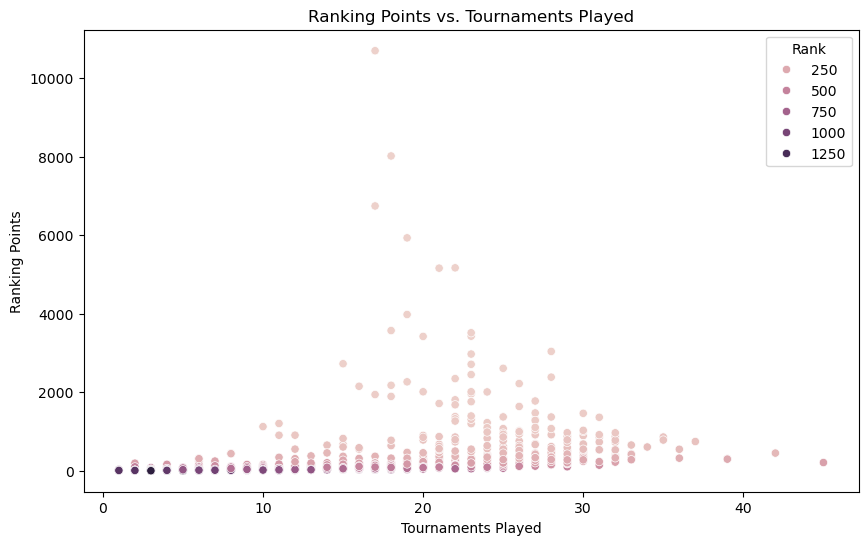

In [102]:
# Scatter plot of Points vs. Tournaments Played
plt.figure(figsize=(10, 6))
sns.scatterplot(x='No of trn', y='Points', data=df, hue='Rank')
plt.title('Ranking Points vs. Tournaments Played')
plt.xlabel('Tournaments Played')
plt.ylabel('Ranking Points')
plt.show()

In [ ]:
# Box plot of Ranking by Age Group (create age groups if needed)
df['Age Group'] = pd.cut(df['Age'], bins=[15, 20, 25, 30, 35, 40], labels=['15-20', '21-25', '26-30', '31-35', '36-40'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Rank (1st)', data=df)
plt.title('WTA Ranking by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Ranking')
plt.show()

**X. Ordering, partitioning and saving to parquet**

In [94]:
# Sort by 'Rank Date' and 'Name'
df = df.sort_values(by=['Rank Date', 'Name'])


df.set_index('Name', inplace=True)

# Get current date and time for file naming
now = datetime.now().strftime("%Y-%m-%d-%H%M%S")

# Save as Parquet, partitioned by 'Rank Date' and 'Name'
output_parquet_dir = "../data/processed/wta_rankings"
os.makedirs(output_parquet_dir, exist_ok=True)  
df.to_parquet(output_parquet_dir, partition_cols=['Rank Date'])

print(f"WTA rankings data saved as Parquet to {output_parquet_dir}")

df

WTA rankings data saved as Parquet to ../data/processed/wta_rankings


,Rank Date,Rank,Prior,Nationality,Points,No of trn,Added,Off,18th,19th
Name,,,,,,,,,,
"ABBAGNATO, ANASTASIA",2024-08-26,451,455,ITA,122,22,0.0,10.0,1.0,1.0
"ABDURAIMOVA, NIGINA",2024-08-26,289,287,UZB,232,32,0.0,30.0,2.0,2.0
"ABE, HIROMI",2024-08-26,541,567,JPN,91,15,10.0,1.0,NaN,NaN
"ADAMS, JULIA",2024-08-26,1254,1249,USA,8,5,0.0,0.0,NaN,NaN
"ADESHINA, ESTHER",2024-08-26,1110,1103,GBR,12,2,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
"ZUND, SYLVIE",2024-08-26,786,785,LIE,36,9,0.0,10.0,NaN,NaN
"ZVEREVA, VLADA",2024-08-26,1402,9999,NaN,3,3,1.0,0.0,NaN,NaN
"ZVONAREVA, VERA",2024-08-26,290,288,NaN,230,12,0.0,40.0,NaN,NaN
